#Recession Prediction model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files.upload()

Saving recessiondata.csv to recessiondata.csv


{'recessiondata.csv': b'Dates,Payrolls_3mo_pct_chg_annualized,Payrolls_12mo_pct_chg,Payrolls_3mo_vs_12mo,Unemployment_Rate,Unemployment_Rate_12mo_chg,Real_Fed_Funds_Rate,Real_Fed_Funds_Rate_12mo_chg,CPI_3mo_pct_chg_annualized,CPI_12mo_pct_chg,CPI_3mo_vs_12mo,10Y_Treasury_Rate_12mo_chg,3M_Treasury_Rate_12mo_chg,3M_10Y_Treasury_Spread,3M_10Y_Treasury_Spread_12mo_chg,5Y_10Y_Treasury_Spread,S&P_500_3mo_chg,S&P_500_12mo_chg,S&P_500_3mo_vs_12mo,IPI_3mo_pct_chg_annualized,IPI_12mo_pct_chg,IPI_3mo_vs_12mo,Recession\n01-02-2021,0.002415458,-0.063080521,0.065495979,6.3,2.8,-1.210139813,-1.46,0.021872405,0.013001398,0.008871007,-0.68,-1.44,1,0.76,0.63,0.081386008,0.325690003,-0.244303995,0.127627491,-0.035824927,0.163452419,0\n01-01-2021,0.020370184,-0.061460384,0.081830567,6.7,3.1,-1.048808244,-1.46,0.02200495,0.011388082,0.010616868,-0.93,-1.45,0.84,0.52,0.54,0.135867116,0.151516644,-0.015649529,0.056869244,-0.054077289,0.110946533,0\n01-12-2020,0.047878886,-0.058968885,0.106847771,6.7,3.1,-1.1

#Exploratory Data Analysis

In [3]:
# Load the dataset
data = pd.read_csv('recessiondata.csv')

In [4]:
# Summary statistic
data.describe()

,Payrolls_3mo_pct_chg_annualized,Payrolls_12mo_pct_chg,Payrolls_3mo_vs_12mo,Unemployment_Rate,Unemployment_Rate_12mo_chg,Real_Fed_Funds_Rate,Real_Fed_Funds_Rate_12mo_chg,CPI_3mo_pct_chg_annualized,CPI_12mo_pct_chg,CPI_3mo_vs_12mo,...,3M_10Y_Treasury_Spread,3M_10Y_Treasury_Spread_12mo_chg,5Y_10Y_Treasury_Spread,S&P_500_3mo_chg,S&P_500_12mo_chg,S&P_500_3mo_vs_12mo,IPI_3mo_pct_chg_annualized,IPI_12mo_pct_chg,IPI_3mo_vs_12mo,Recession
count,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,...,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000
mean,0.016796,0.016363,0.000433,5.937103,0.049301,1.200127,-0.014651,0.035834,0.035544,0.000290,...,1.453723,-0.012389,0.307967,0.020175,0.083318,-0.063143,0.028624,0.026860,0.001764,0.139771
std,0.037991,0.022420,0.031523,1.663711,1.291323,2.338586,2.059888,0.032789,0.027867,0.017581,...,1.182248,1.202391,0.406075,0.073448,0.155575,0.137100,0.085496,0.051806,0.072821,0.346970
min,-0.465587,-0.135039,-0.330548,3.400000,-2.900000,-5.665074,-7.700000,-0.129832,-0.019588,-0.129610,...,-2.650000,-3.970000,-0.720000,-0.301698,-0.447562,-0.529348,-0.511811,-0.162613,-0.349198,0.000000
25%,0.009531,0.008013,-0.007192,4.700000,-0.600000,-0.511921,-0.875000,0.018824,0.017019,-0.007511,...,0.555000,-0.710000,0.040000,-0.019613,-0.013479,-0.148808,-0.002238,0.004252,-0.030675,0.000000
50%,0.019823,0.018818,-0.000155,5.600000,-0.300000,1.145331,0.040000,0.029826,0.028678,0.000943,...,1.420000,-0.150000,0.210000,0.024196,0.098632,-0.073247,0.030017,0.029727,-0.003831,0.000000
75%,0.031100,0.029784,0.005744,7.000000,0.400000,2.774346,0.985000,0.046599,0.043529,0.009992,...,2.410000,0.760000,0.515000,0.065036,0.184316,0.020096,0.068379,0.058183,0.021785,0.000000
max,0.321889,0.056368,0.397078,14.800000,11.100000,9.343030,10.010000,0.177131,0.145923,0.062132,...,4.420000,5.520000,1.460000,0.250377,0.529422,0.594027,0.554573,0.216668,0.620362,1.000000


In [5]:
# Checking for missing values
data.isnull().sum()

Dates                              0
Payrolls_3mo_pct_chg_annualized    0
Payrolls_12mo_pct_chg              0
Payrolls_3mo_vs_12mo               0
Unemployment_Rate                  0
Unemployment_Rate_12mo_chg         0
Real_Fed_Funds_Rate                0
Real_Fed_Funds_Rate_12mo_chg       0
CPI_3mo_pct_chg_annualized         0
CPI_12mo_pct_chg                   0
CPI_3mo_vs_12mo                    0
10Y_Treasury_Rate_12mo_chg         0
3M_Treasury_Rate_12mo_chg          0
3M_10Y_Treasury_Spread             0
3M_10Y_Treasury_Spread_12mo_chg    0
5Y_10Y_Treasury_Spread             0
S&P_500_3mo_chg                    0
S&P_500_12mo_chg                   0
S&P_500_3mo_vs_12mo                0
IPI_3mo_pct_chg_annualized         0
IPI_12mo_pct_chg                   0
IPI_3mo_vs_12mo                    0
Recession                          0
dtype: int64

In [ ]:
data.head()

,Dates,Year,Payrolls_3mo_pct_chg_annualized,Payrolls_12mo_pct_chg,Payrolls_3mo_vs_12mo,Unemployment_Rate,Unemployment_Rate_12mo_chg,Real_Fed_Funds_Rate,Real_Fed_Funds_Rate_12mo_chg,CPI_3mo_pct_chg_annualized,...,3M_10Y_Treasury_Spread,3M_10Y_Treasury_Spread_12mo_chg,5Y_10Y_Treasury_Spread,S&P_500_3mo_chg,S&P_500_12mo_chg,S&P_500_3mo_vs_12mo,IPI_3mo_pct_chg_annualized,IPI_12mo_pct_chg,IPI_3mo_vs_12mo,Recession
0,2021-01-02,2021,0.002415,-0.063081,0.065496,6.3,2.8,-1.210140,-1.46,0.021872,...,1.00,0.76,0.63,0.081386,0.325690,-0.244304,0.127627,-0.035825,0.163452,0
1,2021-01-01,2021,0.020370,-0.061460,0.081831,6.7,3.1,-1.048808,-1.46,0.022005,...,0.84,0.52,0.54,0.135867,0.151517,-0.015650,0.056869,-0.054077,0.110947,0
2,2020-01-12,2020,0.047879,-0.058969,0.106848,6.7,3.1,-1.104699,-1.46,0.029050,...,0.78,0.51,0.48,0.116881,0.162589,-0.045708,0.068299,-0.049723,0.118023,0
3,2020-01-11,2020,0.088152,-0.059258,0.147410,6.9,3.3,-1.319961,-1.74,0.045324,...,0.69,0.63,0.45,0.034660,0.153025,-0.118366,0.211005,-0.062808,0.273813,0
4,2020-01-10,2020,0.122018,-0.062539,0.184558,7.8,4.3,-1.234780,-1.95,0.056956,...,0.57,0.76,0.41,-0.000355,0.076509,-0.076863,0.546238,-0.065500,0.611738,0


#Feature Engineering

In [24]:
# Extracting the date-related features from the "Date" column
data['Dates'] = pd.to_datetime(data['Dates'])  # Convert to datetime format
data['DayOfWeek'] = data['Dates'].dt.dayofweek  # for day of the week (0 = Monday, 6 = Sunday)
data['Month'] = data['Dates'].dt.month  # for month (1 = January, 12 = December)
data['Year'] = data['Dates'].dt.year  # year

In [25]:
data.columns

Index(['Dates', 'Payrolls_3mo_pct_chg_annualized', 'Payrolls_12mo_pct_chg',
       'Payrolls_3mo_vs_12mo', 'Unemployment_Rate',
       'Unemployment_Rate_12mo_chg', 'Real_Fed_Funds_Rate',
       'Real_Fed_Funds_Rate_12mo_chg', 'CPI_3mo_pct_chg_annualized',
       'CPI_12mo_pct_chg', 'CPI_3mo_vs_12mo', '10Y_Treasury_Rate_12mo_chg',
       '3M_Treasury_Rate_12mo_chg', '3M_10Y_Treasury_Spread',
       '3M_10Y_Treasury_Spread_12mo_chg', '5Y_10Y_Treasury_Spread',
       'S&P_500_3mo_chg', 'S&P_500_12mo_chg', 'S&P_500_3mo_vs_12mo',
       'IPI_3mo_pct_chg_annualized', 'IPI_12mo_pct_chg', 'IPI_3mo_vs_12mo',
       'Recession', 'DayOfWeek', 'Month', 'Year'],
      dtype='object')

In [26]:
data.dtypes

Dates                              datetime64[ns]
Payrolls_3mo_pct_chg_annualized           float64
Payrolls_12mo_pct_chg                     float64
Payrolls_3mo_vs_12mo                      float64
Unemployment_Rate                         float64
Unemployment_Rate_12mo_chg                float64
Real_Fed_Funds_Rate                       float64
Real_Fed_Funds_Rate_12mo_chg              float64
CPI_3mo_pct_chg_annualized                float64
CPI_12mo_pct_chg                          float64
CPI_3mo_vs_12mo                           float64
10Y_Treasury_Rate_12mo_chg                float64
3M_Treasury_Rate_12mo_chg                 float64
3M_10Y_Treasury_Spread                    float64
3M_10Y_Treasury_Spread_12mo_chg           float64
5Y_10Y_Treasury_Spread                    float64
S&P_500_3mo_chg                           float64
S&P_500_12mo_chg                          float64
S&P_500_3mo_vs_12mo                       float64
IPI_3mo_pct_chg_annualized                float64


#Evalauating the accuracy over the various classification algorithms

In [27]:
from sklearn.model_selection import train_test_split

X = data.drop(['Dates','Recession'], axis=1)
y = data['Recession']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [29]:
# Initializing the models
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "SVM": SVC(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [30]:
# Creating a dictionary to store classification report
reports = {}

In [31]:
from sklearn.metrics import classification_report

reports = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=["No Recession", "Recession"])
    reports[name] = report

for name, report in reports.items():
    print(f"Classification Report for {name}:\n{report}\n{'='*50}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for RandomForest:
              precision    recall  f1-score   support

No Recession       0.99      0.99      0.99       142
   Recession       0.88      0.88      0.88        16

    accuracy                           0.97       158
   macro avg       0.93      0.93      0.93       158
weighted avg       0.97      0.97      0.97       158

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

No Recession       0.94      0.97      0.96       142
   Recession       0.64      0.44      0.52        16

    accuracy                           0.92       158
   macro avg       0.79      0.70      0.74       158
weighted avg       0.91      0.92      0.91       158

Classification Report for SVM:
              precision    recall  f1-score   support

No Recession       0.90      1.00      0.95       142
   Recession       0.00      0.00      0.00        16

    accuracy                           0.90       158
   macro av

#Comparing accuracies of models

In [161]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [160]:
# Initializing models
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "SVM": SVC(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

# Initializing a dictionary to store accuracies
accuracies = {}

In [162]:
# Looping through the models and calculate accuracy
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

In [171]:
accuracies

{'RandomForest': 0.9746835443037974,
 'LogisticRegression': 0.9177215189873418,
 'SVM': 0.8987341772151899,
 'XGBoost': 1.0}

In [173]:
# Accuracy dictionary
accuracy_dict = {
    'Model': ['RandomForest', 'LogisticRegression', 'SVM', 'XGBoost'],
    'Accuracy': [0.9746835443037974, 0.9177215189873418, 0.8987341772151899, 1.0]
}

accuracy_df = pd.DataFrame.from_dict(accuracy_dict)
accuracy_df

,Model,Accuracy
0,RandomForest,0.974684
1,LogisticRegression,0.917722
2,SVM,0.898734
3,XGBoost,1.000000


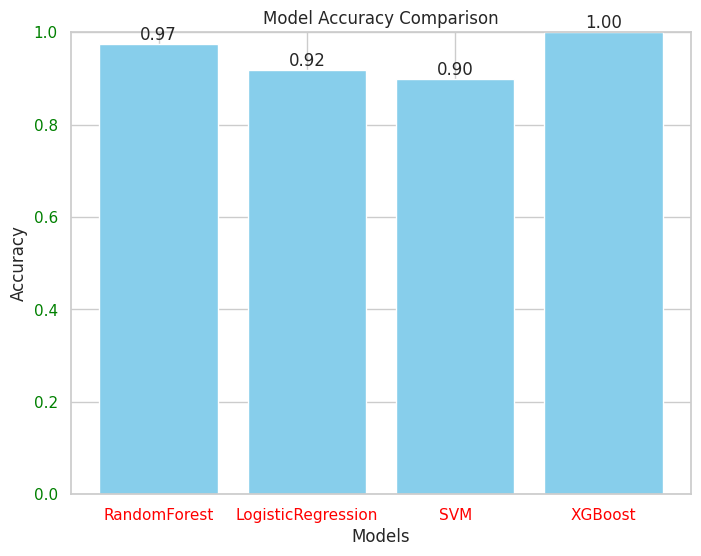

In [169]:
# Creating a bar chart to visualize model accuracies
plt.figure(figsize=(8, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(color='red')
plt.yticks(color='green')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1
# Adding values on top of the bars
for model, accuracy in accuracies.items():
    plt.text(model, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

plt.show()

#From the above evaluation we can see clearly that Xgboost model has the higest accuracy, so we are going to use xgboost model

In [43]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into features (X) and target (y)
X = data.drop(['Dates','Recession'],axis=1)
y = data['Recession']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the XGBoost classifier
model = XGBClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generating a classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       142
           1       1.00      1.00      1.00        16

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



#It seems Accuracy is very well almost in all the models, so there is chance of class imbalance so we have to check the model evaluation by balacing the classes.

In [34]:
data[data['Recession']==1]

,Dates,Payrolls_3mo_pct_chg_annualized,Payrolls_12mo_pct_chg,Payrolls_3mo_vs_12mo,Unemployment_Rate,Unemployment_Rate_12mo_chg,Real_Fed_Funds_Rate,Real_Fed_Funds_Rate_12mo_chg,CPI_3mo_pct_chg_annualized,CPI_12mo_pct_chg,...,S&P_500_3mo_chg,S&P_500_12mo_chg,S&P_500_3mo_vs_12mo,IPI_3mo_pct_chg_annualized,IPI_12mo_pct_chg,IPI_3mo_vs_12mo,Recession,DayOfWeek,Month,Year
140,2009-01-06,-0.053990,-0.046301,-0.007689,9.4,4.0,0.756324,-1.80,0.014727,-0.005763,...,0.152218,-0.281781,0.433999,-0.114730,-0.148208,0.033478,1,1,1,2009
141,2009-01-05,-0.065125,-0.045047,-0.020078,9.0,4.0,0.596479,-2.13,0.020919,-0.004465,...,0.250377,-0.343650,0.594027,-0.169695,-0.147859,-0.021836,1,0,1,2009
142,2009-01-04,-0.067264,-0.041678,-0.025586,8.7,3.6,0.171537,-2.43,-0.008381,0.000085,...,0.056824,-0.370081,0.426905,-0.213934,-0.136179,-0.077756,1,6,1,2009
143,2009-01-03,-0.064286,-0.036234,-0.028053,8.3,3.4,0.333586,-2.76,-0.090096,-0.001136,...,-0.116668,-0.396787,0.280119,-0.233122,-0.133489,-0.099633,1,5,1,2009
144,2009-01-02,-0.063505,-0.031416,-0.032089,7.8,2.8,0.172228,-3.79,-0.129832,-0.000222,...,-0.179807,-0.447562,0.267756,-0.123144,-0.114799,-0.008345,1,4,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,1957-01-12,-0.042230,-0.004979,-0.037250,5.1,0.8,0.335616,0.40,0.018574,0.029444,...,-0.057284,-0.143133,0.085848,-0.089834,-0.020860,-0.068974,1,5,1,1957
759,1957-01-11,-0.026833,-0.000265,-0.026567,4.5,0.6,-0.046618,0.54,0.030219,0.035466,...,-0.077399,-0.074534,-0.002865,-0.009818,0.002476,-0.012294,1,4,1,1957
760,1957-01-10,-0.009987,0.006273,-0.016261,4.4,0.5,-0.081813,0.52,0.040604,0.035518,...,-0.142976,-0.099166,-0.043810,0.035009,0.034177,0.000832,1,3,1,1957
761,1957-01-09,-0.001655,0.009443,-0.011098,4.1,0.0,-0.057911,0.51,0.037759,0.032979,...,-0.104497,-0.064609,-0.039888,0.019831,0.076417,-0.056586,1,2,1,1957


In [35]:
Recis=(data['Recession']==1).sum()
print('Recession is there ->no of rows:',Recis)

Recession is there ->no of rows: 110


In [36]:
Recno=(data['Recession']==0).sum()
print('Recession is not there ->no of rows:',Recno)

Recession is not there ->no of rows: 677


#There are 110 rows where there is recession and 667 for not a recession, so there is definitely some class imbalance.Lets do some class balancing..

In [44]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Split data into features (X) and target (y)
X = data.drop(['Dates','Recession'],axis=1)
y = data['Recession']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the XGBoost classifier
model = XGBClassifier(random_state=42)

# Fit the model to the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy_after_balancing= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_after_balancing)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)


Accuracy: 0.9620253164556962

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       142
           1       0.73      1.00      0.84        16

    accuracy                           0.96       158
   macro avg       0.86      0.98      0.91       158
weighted avg       0.97      0.96      0.96       158



# After the class balancing we are getting some realistict accuracy now.

#Accuracy Comaparision before and after class balancing

In [60]:
results_df= pd.DataFrame({
    'Accuracy Before Balancing': [accuracy],
    'Accuracy After Balancing': [accuracy_after_balancing]
})

In [64]:
# Creating a DataFrame with accuracy values
results_df = pd.DataFrame({
    'Accuracy': [accuracy,accuracy_after_balancing]
}, index=['Before Balancing', 'After Balancing'])


In [65]:
results_df

,Accuracy
Before Balancing,1.000000
After Balancing,0.962025


In [68]:
import seaborn as sns

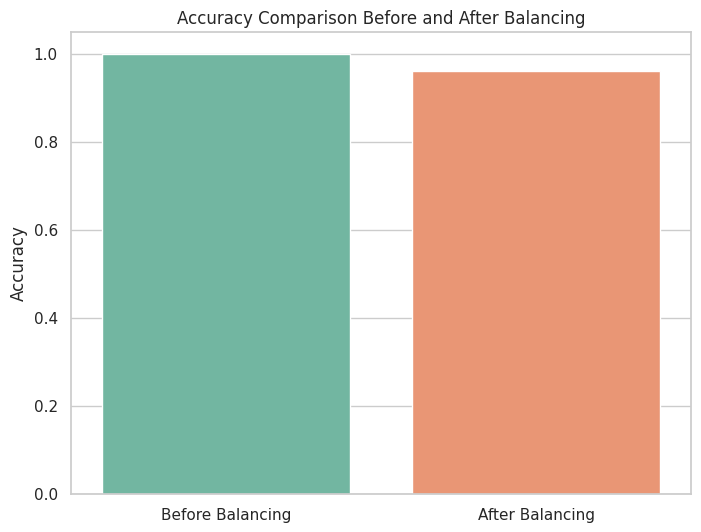

In [67]:
#Bar graph for comparision
plt.figure(figsize=(8, 6))
sns.barplot(x=results_df.index, y='Accuracy', data=results_df, palette="Set2")

plt.title('Accuracy Comparison Before and After Balancing')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)

plt.show()

#Checking the Fetaure importance as we have many features

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


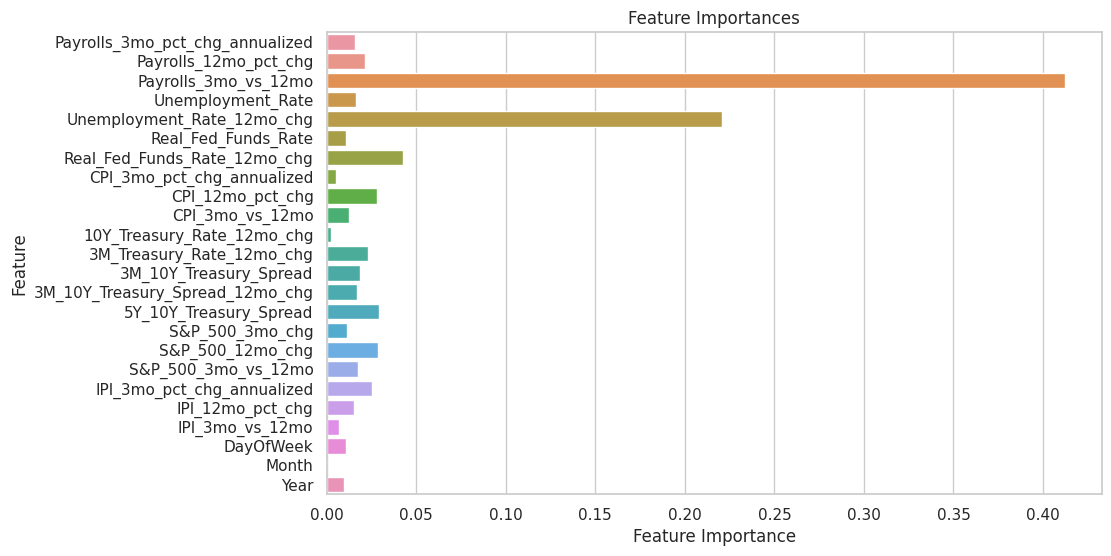

In [71]:
# Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.show()

In [72]:
import numpy as np

In [73]:
model.feature_importances_

array([0.01563586, 0.02160122, 0.41221473, 0.01632604, 0.22062153,
       0.01050105, 0.04278081, 0.00512975, 0.02829283, 0.01216335,
       0.00239799, 0.02286415, 0.01842524, 0.01673301, 0.02908875,
       0.01136032, 0.02841205, 0.01744405, 0.02546315, 0.01508194,
       0.00687436, 0.01081297, 0.        , 0.00977486], dtype=float32)

#Reducing unecessary features and keeping only relevant features in the model

#So we are going to prepare the final model with balancing the class and considering important features.

In [114]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold

In [115]:
# Split data into features (X) and target (y)
X = data.drop(['Dates','Recession'],axis=1)
y = data['Recession']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [116]:
# Identify and remove constant features (if any)
constant_feature_selector = VarianceThreshold(threshold=0)
X_train_no_const = constant_feature_selector.fit_transform(X_train)
X_test_no_const = constant_feature_selector.transform(X_test)

#SMOTE stands for "Synthetic Minority Over-sampling Technique." It is a technique used in machine learning and data analysis to address the problem of class imbalance in classification tasks.
so we are balancing the class using smote technique

In [117]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_no_const, y_train)


#Appyling Annova for the best feature selection

In [118]:
# Initialize SelectKBest with ANOVA as the scoring function
num_features_to_select = 5  # Choose the number of features to keep
anova_selector = SelectKBest(score_func=f_classif, k=num_features_to_select)

In [128]:
# Get the mask of selected features from the ANOVA selector
selected_features_mask = anova_selector.get_support()

# Get the names of all columns (features)
all_feature_names = X.columns

selected_feature_names = [feature for feature, selected in zip(all_feature_names, selected_features_mask) if selected]

print("Selected Features by ANOVA:", selected_feature_names)

Selected Features by ANOVA: ['Payrolls_3mo_pct_chg_annualized', 'Unemployment_Rate_12mo_chg', 'S&P_500_12mo_chg', 'S&P_500_3mo_vs_12mo', 'IPI_3mo_pct_chg_annualized']


In [119]:
# Fit the selector to the resampled training data and transform the features
X_train_selected = anova_selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = anova_selector.transform(X_test_no_const)

In [120]:
# Initialize the XGBoost classifier
model = XGBClassifier(random_state=42)

In [121]:
# Fit the model to the reduced training data (after feature selection)
model.fit(X_train_selected, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [129]:
# Make predictions on the test data (after feature selection)
y_pred = model.predict(X_test_selected)

# Calculate accuracy after feature selection and SMOTE
accuracy_after_feature_selection_and_smote = accuracy_score(y_test, y_pred)
print("Accuracy After Feature Selection and SMOTE:", accuracy_after_feature_selection_and_smote)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)


Accuracy After Feature Selection and SMOTE: 0.9556962025316456

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       142
           1       0.74      0.88      0.80        16

    accuracy                           0.96       158
   macro avg       0.86      0.92      0.89       158
weighted avg       0.96      0.96      0.96       158



#Now the model is performing very well after reducing the features and after class balancing.

#Confusion matrix

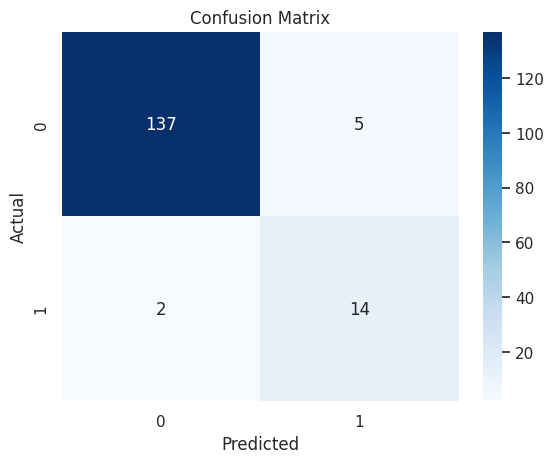

In [123]:
# Generate a confusion matrix
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

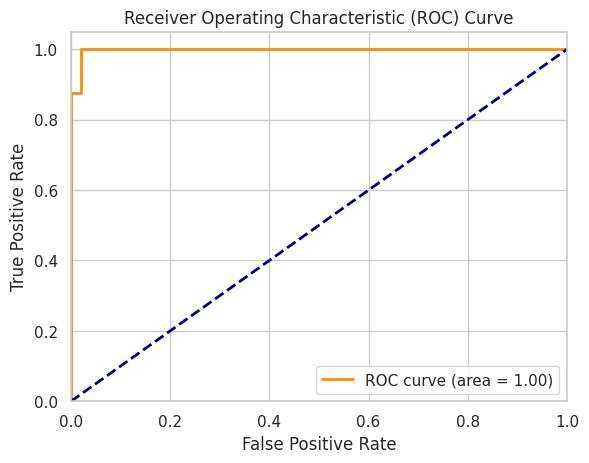

In [124]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [130]:
# Calculate ROC curve and AUC
y_score = model.predict_proba(X_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

In [131]:
# Calculate and print ROC AUC score
roc_auc_score_value = roc_auc_score(y_test, y_score)
print("ROC AUC Score:", roc_auc_score_value)

ROC AUC Score: 0.9920774647887325


#Accuracy comparision of model before class balancing, after class balancing and after class balacing with feature reduction

In [167]:
# Create a DataFrame with accuracy values
results_df = pd.DataFrame({
    'Accuracy': [accuracy,accuracy_after_balancing,accuracy_after_feature_selection_and_smote]
}, index=['Before Balancing', 'After Balancing','After Balancing and Feature Selection'])


In [147]:
results_df

,Accuracy
Before Balancing,0.981013
AfterBalancing,0.962025
After Balancing and Feature Selection,0.955696


#Bar graph for comparisong of accuracies for different scenarios

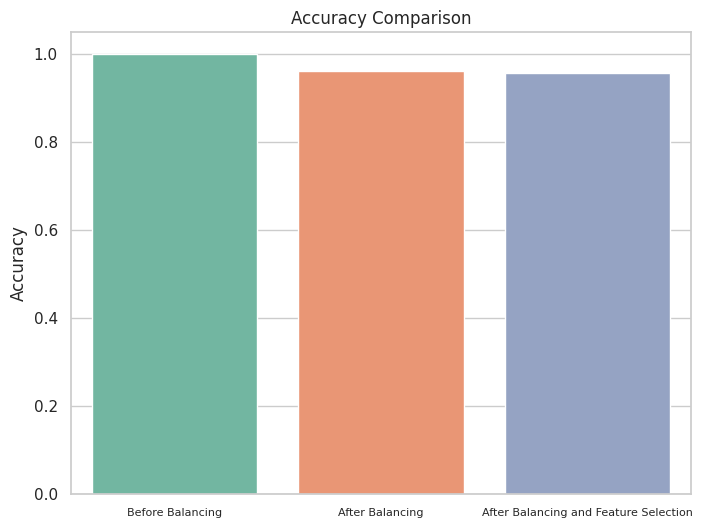

In [168]:
# Plot the accuracy comparison using a bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x=results_df.index, y='Accuracy', data=results_df, palette="Set2")

plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(fontsize=8)

plt.show()

#Line Chart showing the accuracy variation of the model in the different scenarios

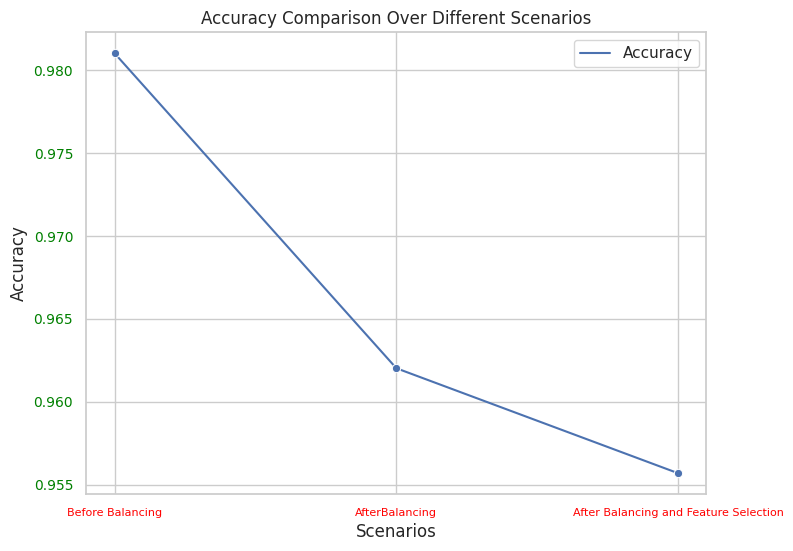

In [158]:
colors = ['blue', 'green', 'purple']
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, marker='o',color='green')

plt.title('Accuracy Comparison Over Different Scenarios')
plt.ylabel('Accuracy')
plt.xlabel('Scenarios')

plt.xticks(fontsize=8,color='red')
plt.yticks(fontsize=10,color='green')
plt.show()

#Now we can say the model is become efficient and realistict and performing good, now we are ready to deploty this model on our local machine

In [174]:
import joblib

# Save the trained model
joblib.dump(model, 'recession_model.joblib')

['recession_model.joblib']

In [ ]:
import xgboost as xgb

print(xgb.__version__)


1.7.6
